Given Code by Professor

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# input data  (student to implement fetch function to grab inputs/outputs file and transform accordingly)
# The location to fecth data is:  https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv

inputs = np.array([[0, 1, 0],
                [0, 1, 1],])
# output data
outputs = np.array([[0], [0]])

In [50]:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []
        self.accuracy_history = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 500 iterations
    def train(self, epochs):
        self.error_history = []
        self.epoch_list = []
        self.accuracy_history = []
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)
            self.accuracy_history.append(self.accuracy())

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

    def accuracy(self):
        predicted_values = []
        for i in self.inputs:
            predicted_values.append(self.predict(i))
        correctly_predicted = np.sum(np.argmax(predicted_values, 1) == np.argmax(outputs, 1)) 
        accuracy = (correctly_predicted) / len(predicted_values)
        return accuracy

    '''
    SoftMax activation function start
    '''
    def softmax(self, x, deriv=False):
      if deriv == True:
        return x * (1 - x)
      return (np.exp(x) / sum(np.exp(x)))

    def feed_forward_softmax(self):
        self.hidden = self.softmax(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation_softmax(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.softmax(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    def train_softmax(self, epochs):
        self.error_history = []
        self.epoch_list = []
        self.accuracy_history = []
        for epoch in range(epochs):
                # flow forward and produce an output
                self.feed_forward_softmax()
                # go back though the network to make corrections based on the output
                self.backpropagation_softmax()    
                # keep track of the error history over each epoch
                self.error_history.append(np.average(np.abs(self.error)))
                self.epoch_list.append(epoch)

    def predict_softmax(self, new_input):
        prediction = self.softmax(np.dot(new_input, self.weights))
        return prediction



[[0.44866936]]  - Correct:  1
[[0.30552324]]  - Correct:  0


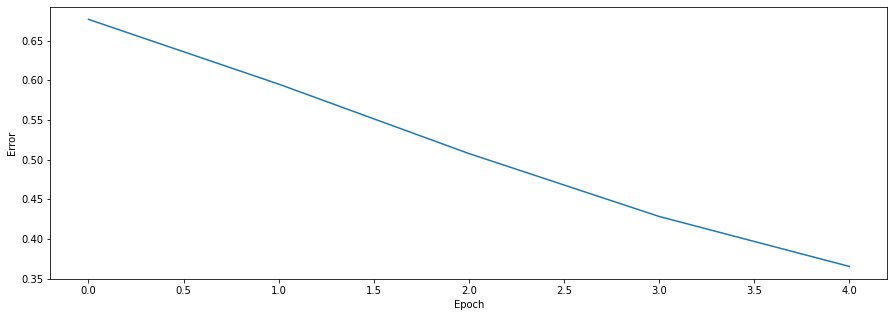

In [42]:
# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train(5)

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

Section 3) Determine the number of epochs needed to achieve 99% prediction accuracy. Manipulate the plot to clearly show this (35%) (Once with the code running after your previous modifications, determine the number of epochs needed to achieve 99% prediction accuracy. I will look at your plot for this but put a comment in your Jupyter cells and call out that number clearly, the number of epochs you determined were needed. The plot will give me confirmation of your statement.)

Importing the required Packages and reading input from given URL

In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# input data  (student to implement fetch function to grab inputs/outputs file and transform accordingly)
# The location to fecth data is:  https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv
input_url=input('Enter the URL to fetch the data: ')
#df=pd.read_csv('https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv')


Enter the URL to fetch the data: https://github.com/barnysanchez/clarku-assignment4/raw/main/inputANDoutputs.csv


In [44]:
df=pd.read_csv(input_url)
inputs = df.drop("output",axis=1).values
inputs

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 0, 0]])

In [45]:
outputs = df[['output']].values
outputs

# output data
#outputs = np.array([[0], [0]])

array([[0],
       [0],
       [1],
       [1]])

Neural Network finding out the number of epochs required to achieve 99% accuracy with sigmoid function

In [47]:

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 600 iterations
    def train(self, epochs):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction



[[0.99874854]]  - Correct:  1
[[0.00367582]]  - Correct:  0


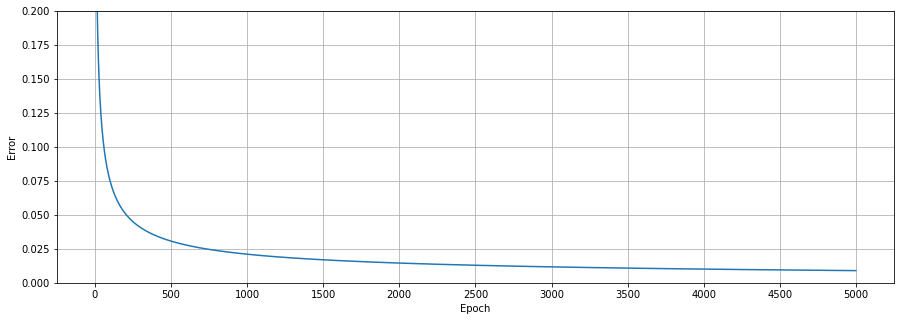

In [48]:
# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train(5000)

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid(b=True)
plt.ylim([0,0.2])
plt.xticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.show()

After 600 epochs we can see it achieved 99% accuracy with sigmoid function

Lets Try on Softmax function

In [52]:
# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []
        self.accuracy_history = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 500 iterations
    def train(self, epochs):
        self.error_history = []
        self.epoch_list = []
        self.accuracy_history = []
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)
            self.accuracy_history.append(self.accuracy())

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

    def accuracy(self):
        predicted_values = []
        for i in self.inputs:
            predicted_values.append(self.predict(i))
        correctly_predicted = np.sum(np.argmax(predicted_values, 1) == np.argmax(outputs, 1)) 
        accuracy = (correctly_predicted) / len(predicted_values)
        return accuracy

    '''
    SoftMax activation function start
    '''
    def softmax(self, x, deriv=False):
      if deriv == True:
        return x * (1 - x)
      return (np.exp(x) / sum(np.exp(x)))

    def feed_forward_softmax(self):
        self.hidden = self.softmax(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation_softmax(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.softmax(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    def train_softmax(self, epochs):
        self.error_history = []
        self.epoch_list = []
        self.accuracy_history = []
        for epoch in range(epochs):
                # flow forward and produce an output
                self.feed_forward_softmax()
                # go back though the network to make corrections based on the output
                self.backpropagation_softmax()    
                # keep track of the error history over each epoch
                self.error_history.append(np.average(np.abs(self.error)))
                self.epoch_list.append(epoch)

    def predict_softmax(self, new_input):
        prediction = self.softmax(np.dot(new_input, self.weights))
        return prediction



In [53]:
# train neural network using softmax activation function for 500 epochs
NN = NeuralNetwork(inputs, outputs)
NN.train_softmax(500)

In [54]:
# print the predictions using softmax activation function for both examples
print(f'{NN.predict_softmax(example)} - Correct: {example[0][0]}')
print(f'{NN.predict_softmax(example_2)} - Correct: {example_2[0][0]}')

[[1.]] - Correct: 1
[[1.]] - Correct: 0


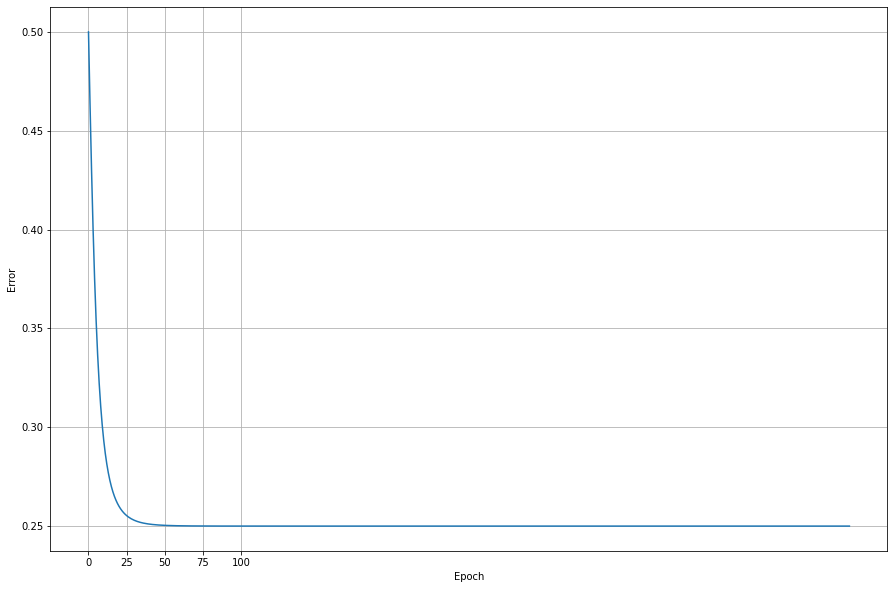

In [58]:
# plot the error over the entire training duration
plt.figure(figsize=(15,10))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xticks([0,25,50,75,100])
plt.grid(b=True)
plt.show()

As you can see from the graph and the prediction , when we use softmax activation function if achieved 99% accuracy after 30 epochs